In [19]:
from read import *

I_degree0 = read_excel_column("data.xlsx", "Sheet1", "B", 5, 24)
U_degree0 = read_excel_column("data.xlsx", "Sheet1", "C", 5, 24)

I_degree30 = read_excel_column("data.xlsx", "Sheet1", "E", 5, 24)
U_degree30 = read_excel_column("data.xlsx", "Sheet1", "F", 5, 24)

I_degree45 = read_excel_column("data.xlsx", "Sheet1", "H", 5, 24)
U_degree45 = read_excel_column("data.xlsx", "Sheet1", "I", 5, 24)

I_ser = read_excel_column("data.xlsx", "Sheet1", "K", 5, 24)
U_ser = read_excel_column("data.xlsx", "Sheet1", "L", 5, 24)

I_par = read_excel_column("data.xlsx", "Sheet1", "N", 5, 24)
U_par = read_excel_column("data.xlsx", "Sheet1", "O", 5, 24)

data = [
    [I_degree0, U_degree0],
    [I_degree30, U_degree30],
    [I_degree45, U_degree45],
    [I_ser, U_ser],
    [I_par, U_par]
]

In [20]:
from func import *
from scipy.optimize import fminbound
from scipy.optimize import fsolve

titles = ['100cm - 0 degree', '100cm - 30 degrees', '100cm - 45 degrees', '4 - parallel', '4 - series']

i = 0

params=[]
for current in data:
    func = ExponentialFit(current[1], current[0])
    current_params = func.fit((19, -1, 1))
    params.append(current_params)

    def f(x):
        return func._exponential_func(x, current_params[0], current_params[1], current_params[2])  # 二次函数

    max_x = fminbound(lambda x: - x * f(x), 0, 14)  # 求-f(x)的极小值
    max_value = max_x * f(max_x)
    x_solution = fsolve(f, x0=14)[0]
    print(f"情况: {titles[i]}")
    i += 1
    print(f"短路电流: I = {f(0):.4f} (mA), 开路电压: U = {x_solution:.4f} (V)")
    print(f"极大值点: U = {max_x:.4f} (V), 极大值: P = {max_value:.4f} (mW)")
    print(f"填充因子: FF = {100 * max_value / (x_solution * f(0)):.4f}%")

print(params)


情况: 100cm - 0 degree
短路电流: I = 18.5293 (mA), 开路电压: U = 3.2874 (V)
极大值点: U = 2.6306 (V), 极大值: P = 44.0396 (mW)
填充因子: FF = 72.2979%
情况: 100cm - 30 degrees
短路电流: I = 17.1002 (mA), 开路电压: U = 3.2667 (V)
极大值点: U = 2.6389 (V), 极大值: P = 41.0714 (mW)
填充因子: FF = 73.5247%
情况: 100cm - 45 degrees
短路电流: I = 13.9631 (mA), 开路电压: U = 3.2325 (V)
极大值点: U = 2.6116 (V), 极大值: P = 33.1924 (mW)
填充因子: FF = 73.5399%
情况: 4 - parallel
短路电流: I = 86.7393 (mA), 开路电压: U = 3.2516 (V)
极大值点: U = 2.6992 (V), 极大值: P = 217.2077 (mW)
填充因子: FF = 77.0134%
情况: 4 - series
短路电流: I = 18.8957 (mA), 开路电压: U = 13.0365 (V)
极大值点: U = 11.0873 (V), 极大值: P = 197.3029 (mW)
填充因子: FF = 80.0960%
[array([ 1.85294380e+01, -1.53328037e-04,  3.55969308e+00]), array([ 1.71002294e+01, -6.13000195e-05,  3.83840853e+00]), array([ 1.39631643e+01, -4.95115348e-05,  3.88240618e+00]), array([ 8.67392828e+01, -1.66405884e-05,  4.75664780e+00]), array([ 1.88957112e+01, -1.04089260e-07,  1.45875164e+00])]


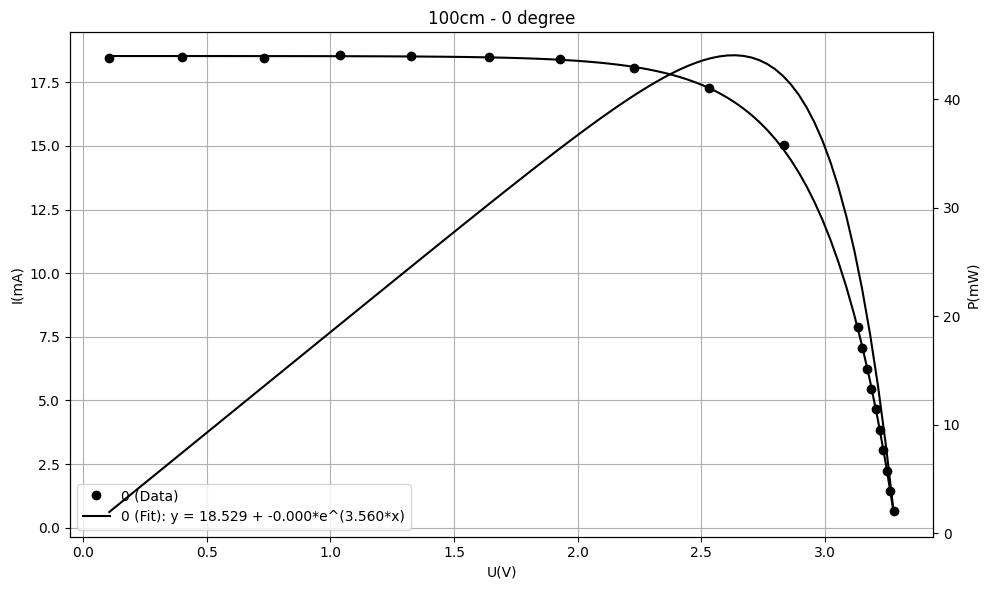

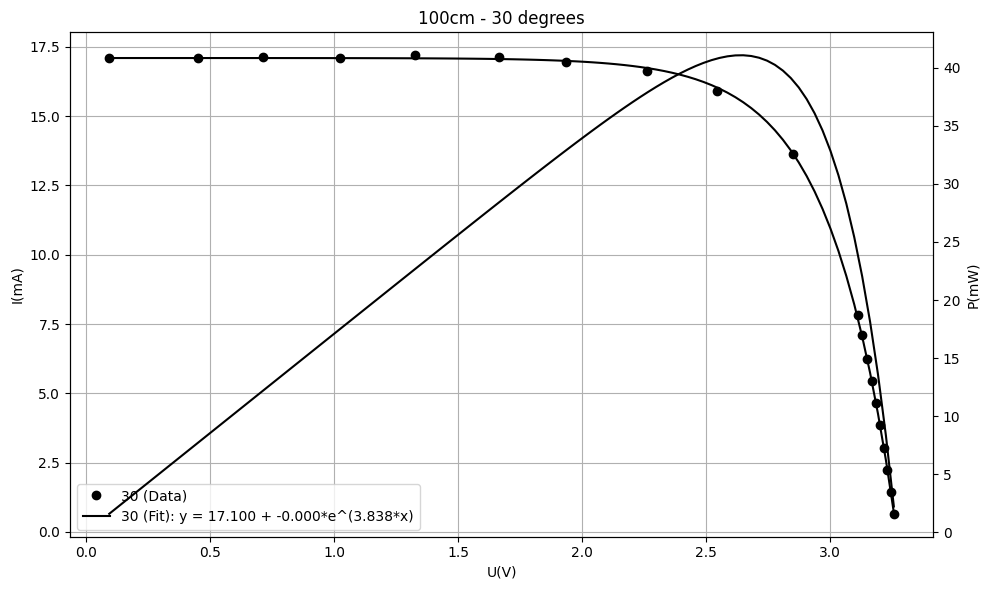

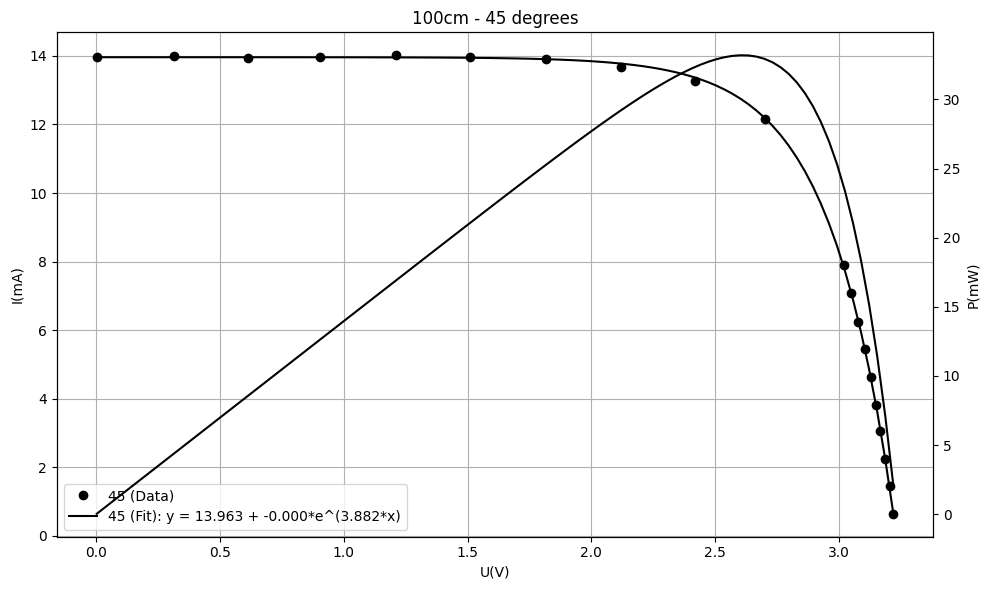

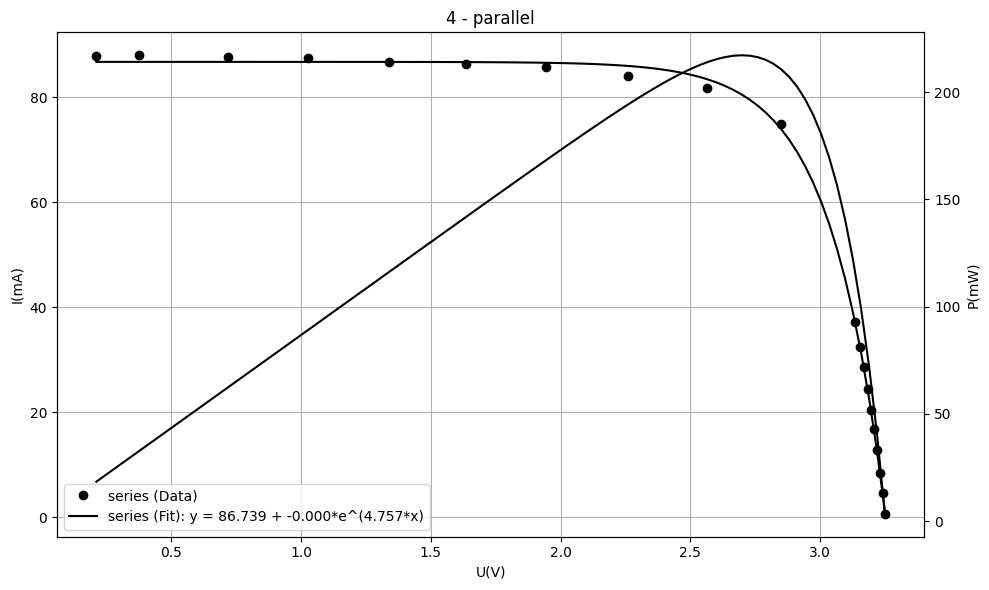

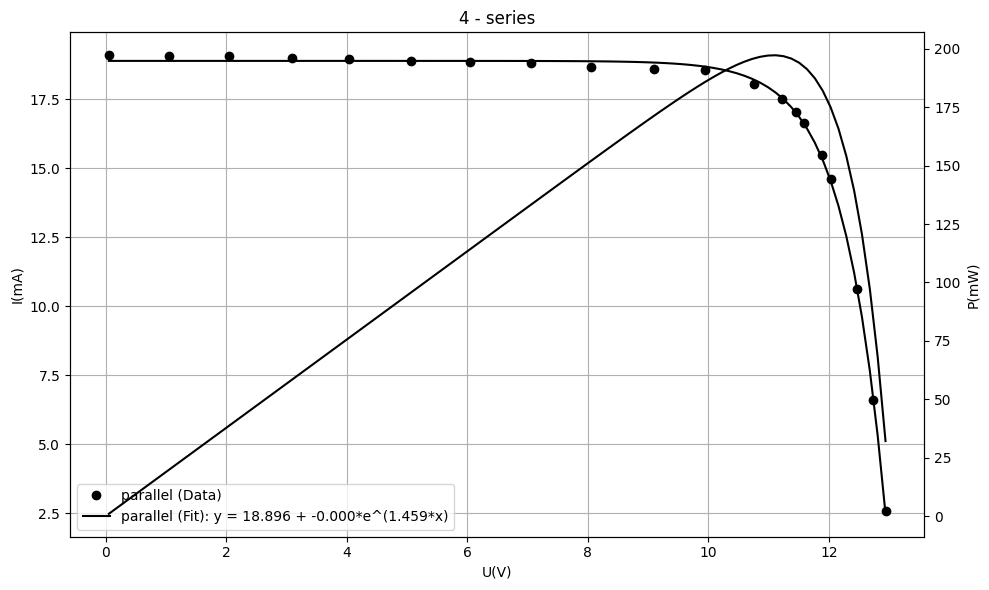

In [21]:
from multiplot import *

labels = ['0', '30', '45', 'series', 'parallel']
titles = ['100cm - 0 degree', '100cm - 30 degrees', '100cm - 45 degrees', '4 - parallel', '4 - series']

for i in range(5):
    plot = MultiExponentialPlotter()
    plot.add_dataset(data[i][1], data[i][0], params[i], 'o', '-', labels[i], 'black')
    plot.show(titles[i])